In [33]:
import math
from matplotlib import pyplot as plt
#import matplotlib.pyplot as plt
from math import *

def fft(arg):
    if(len(arg) == 1):
        return arg[:]
    a = fft(arg[0::2])
    b = fft(arg[1::2])
    angle = 2 * pi / len(arg)
    u = complex(1, 0)
    v = complex(cos(angle), sin(angle))
    result = [complex(0, 0)] * len(arg)
    k = len(arg) // 2
    for i in range(k):
        result[i] = a[i] + u * b[i]
        result[i + k] = a[i] - u * b[i]
        u *= v
    
    return result

In [34]:
def ifft(arg):
    if (len(arg) == 1):
        return arg[:]
    
    a = ifft(arg[0::2])
    b = ifft(arg[1::2])
    angle = -2 * pi / len(arg)
    u = complex(1, 0)
    v = complex(cos(angle), sin(angle))
    result = [complex(0, 0)] * len(arg)
    k = len(arg) // 2
    for i in range(k):
        result[i] = a[i] + u * b[i]
        result[i + k] = a[i] - u * b[i]
        result[i] /= 2
        result[i + k] /= 2
        u *= v
    return result



















In [35]:
def analyze_fft(f, title = ""):
    def discretize(f):
        x = [i/10 for i in range(100)]
        y = [f(i/10) for i in range(100)]
        return x, y
    x, y = discretize(f)
    marker_size = 10
    g = fft(y + [0]*28)
    plt.xlabel("x axis")
    plt.ylabel("y axis")
    plt.title(title)
    series = (
        plt.scatter(x, y, s = marker_size),
        plt.scatter(x, ifft(g)[:100], s = marker_size),
        plt.scatter(x, ifft(g[:127] + [0])[:100], s = marker_size),
        plt.scatter(x, ifft(g[:126] + [0]*2)[:100], s = marker_size),
        plt.scatter(x, ifft(g[:125] + [0]*3)[:100], s = marker_size),
        plt.scatter(x, ifft(g[:124] + [0]*4)[:100], s = marker_size),
        plt.scatter(x, ifft(g[:123] + [0]*5)[:100], s = marker_size),
    )
    plt.figlegend(series, (title, "100%", "99%", "98%", "97%", "96%", "95%", 5))
    plt.show()

/home/arman/.local/lib/python3.6/site-packages/numpy/core/numeric.py:553: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


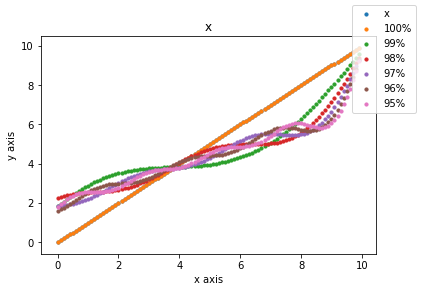

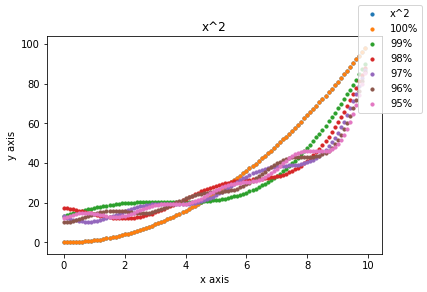

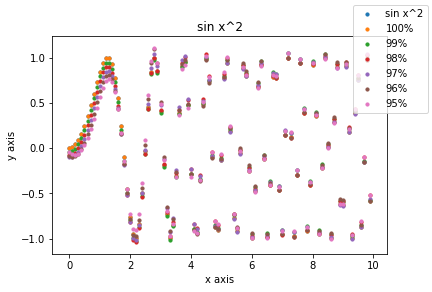

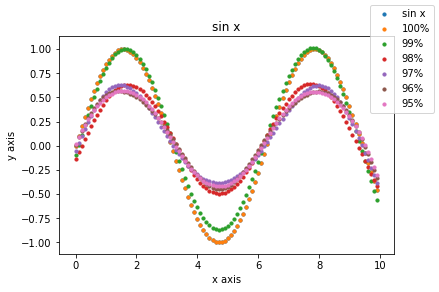

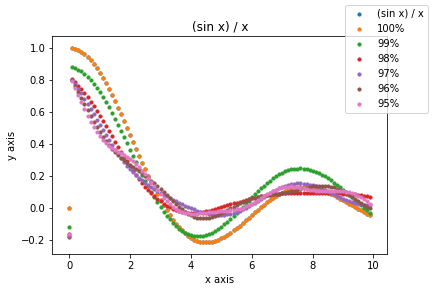

In [36]:
analyze_fft(lambda x: x, "x")
analyze_fft(lambda x: x * x, "x^2")
analyze_fft(lambda x: sin(x * x), "sin x^2")
analyze_fft(sin, "sin x")
analyze_fft(lambda x: sin(x) / (x + 1e-10), "(sin x) / x")